Dear student,

I am asking you to do the following in this problem set. 

## Task 1: OLS in an Object-oriented Way

First, take the OLS code from the class material jupyter notebook and create a nice looking object oriented version for OLS estimation. The class is called "OLS". The constructor reads in the $y$ and $X$ variables. Ensure to add a constant to $X$. Add a function called "runOLS(...)" to that class. This function does the following: (i) compute regression beta and residual, (ii) volatility of the residual, (iii) standard errors and t-stat of beta estimates, (iv) adjusted $R^2$. Add a another function called "summaryStats()". This function executes the function "runOLS()" and displays the regression output for beta, t-stat, adjR2 and plots the time-series of the residual.

Hint: all of the necessary code is in the class notebook.

**Important:** use that OLS class for the upcoming tasks.

## Task 2: Cross-Sectional Equity Predictability

Second, you are going to work with the monthly equity return file "ES50_mthlyReturns_April2021.csv" which I have created in the aftermath of Topic_#1_GettingStarted. This data contains monthly log returns of European BlueChips. I want you to solve the following data challenges: 

### 2.1 Return Decomposition, $r = \mu + \epsilon$

Fit an AR(1) to the return on AI.PA and plot in one graph the time-series of $\mu$ and $\epsilon$. Interpret the graph, using the concept of $R^2$, the t-stat for the AR(1) coefficient, the variance of $y$ and the variance of $\epsilon$ and the variance of $\mu$. 



### 2.2. Cross-Sectional adj-$R^2$

Tell me which of the European BlueChip stock return in "ES50_mthlyReturns_April2021.csv" shows evidence of at least weak predictability. Hint: I consider something weakly predictive, if the absolute value of the t-stat of the AR(1) loading is above 2. Also, how large is the adjusted $R^2$ for that stock?




## Task 3: Market Return

You know by now that firm risk consists of systematic and idiosyncratic risk. You also know that the equal-weight portfolio is pretty well diversified. Hence, treat the equal-weight portfolio of the assets in "ES50_mthlyReturns_April2021.csv" as the market portfolio. Again, that is the return you earn for holding systematic Euro-area Equity Risk (systematic risk only). 


Analyze whether the market is predictable at the monthly frequency. Work with in-sample data only. Report t-stat, beta, adj-$R^2$. Decompose the market return into predictable ($\mu$) and unpredictable part($\epsilon$) and plot both into one graph.


In [1]:
# econometric work
import numpy as np
import pandas as pd
import datetime as dt
import statsmodels.tools.tools as smd
 

# plotting  
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
#task 1
class OLS:
    
    def __init__(self, y, X):
        self.y = y
        ones = np.ones(len(y))
        X_df = pd.DataFrame(ones)
        X_df['x_values'] = X
        self.X = np.matrix(X_df)
    
    def runOLS(self):
        X = self.X
        y = self.y
        T = X.shape[0]
        p = X.shape[1] - 1
        
        beta = (X.getT() * X).getI() * (X.getT() * y)  #(p,1)
        e = y - X * beta  # (T,1)
        
        var_e = ((1 / (T-p-1)) * (e.getT() * e)).item()  #scalar
        var_beta = var_e * ((X.getT() * X).getI())  #(p,p)
        beta_std_err = (np.sqrt(var_beta.diagonal())).reshape(p+1,1)  #(p,1)
        
        t_stat = (beta / beta_std_err)
        
        y_dm = y - y.mean()
        y2_dm = y_dm.T * y_dm
        var_y = (y2_dm  / (T-1)).item()
        adj_R2 = 1 - (var_e / var_y)
        
        self.beta = beta
        self.e = e
        self.var_e = var_e
        self.beta_std_err = beta_std_err
        self.t_stat = t_stat
        self.adj_R2 = adj_R2
        #return beta, e, var_e, beta_std_err, t_stat, adj_R2
    
    def summaryStats(self):
        result = self.runOLS()
        print("Estimation for beta: " + str(self.beta))
        print("Estimation for t-statistic: " + str(self.t_stat))
        print("Estimation for adjusted R2: " + str(self.adj_R2))
        plt.plot(np.arange(len(self.y)), result[1], label='e residuals')
        plt.legend()


In [13]:
#task 2.1
data = pd.read_csv('Data/ES50_mthlyReturns_April2021.csv')
data = data.set_index('Date')

r_df = data['AI.PA']
T = len(r_df)

y_df = r_df[1:]
y = np.matrix(y_df)
y = y.reshape(T-1, 1)  #(255,1)

lag1 = r_df[:T-1]
X = np.matrix(lag1)
X = X.reshape(255, 1)

estimation = OLS(y, X)
estimation.runOLS()
print("beta:",estimation.beta)
print("t-stat:",estimation.t_stat)

r = np.matrix(r_df)
r = r.reshape(256,1)

beta = estimation.beta
mu = beta[0] + beta[1].item() * r
mu = mu.reshape(256,1)
eps = r - mu

def var_calculate(mu, eps, r):
    var_mu = np.var(mu, ddof=1)
    var_eps = np.var(eps, ddof=1)
    var_y = np.var(r, ddof=1)
    return var_mu, var_eps, var_y

print("Var_mu, Var_eps, Var_y:", var_calculate(mu, eps, r))
print("Var_e:",estimation.var_e)

beta: [[ 0.00892843]
 [-0.09408421]]
t-stat: [[ 2.96309335]
 [-1.51166115]]
Var_mu, Var_eps, Var_y: (2.0198101910285155e-05, 0.0027313576068973646, 0.002281797305806509)
Var_e: 0.0022539217106887625


In [4]:
#task 2.2
def weakl_predictive(dataframe):
    for name in list(dataframe):
        r_df = dataframe[name]
        T = len(r_df)

        y_df = r_df[1:]
        y = np.matrix(y_df)
        y = y.reshape(255, 1)  #(255,1)

        lag1 = r_df[:T-1]
        X = np.matrix(lag1)
        X = X.reshape(255, 1)

        estimation2 = OLS(y, X)
        estimation2.runOLS()
        
        if(abs(estimation2.t_stat[1]) > 2):
            print(name, estimation2.t_stat, estimation2.adj_R2)

In [5]:
print(weakl_predictive(data))

MUV2.DE [[ 0.59206373]
 [-2.54380933]] 0.021085079446328092
VIV.PA [[-0.1933307 ]
 [ 2.32667493]] 0.017078897501169643
None


beta: [[0.0046385 ]
 [0.03977366]]
t_stat: [[1.34315166]
 [0.63445677]]
adj_R2: -0.0023577688842633115
Var(e): 0.003020436555755646
Var(mu): 4.786742509809104e-06
Var(y): 0.0030133318157624794


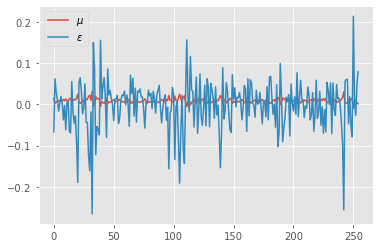

In [31]:
#task 3
r_market = []

for i in range(len(data)):
    returns = []
    for name in list(data):
        returns.append(data[name][i])
    r_market.append(sum(returns) / 40) #creates equal weight portfolio

T = len(r_market)

y = np.matrix(r_market[1:])
y = y.reshape(T-1, 1)  #(255,1)


X = np.matrix(r_market[:T-1])
X = X.reshape(255, 1)

r_market = np.matrix(r_market)
r_market = r_market.reshape(256,1)

estimation3 = OLS(y, X)
estimation3.runOLS()

beta = estimation.beta
mu = beta[0] + beta[1].item() * X
mu = mu.reshape(255,1)
eps = X - mu

plt.plot(mu, label="$\mu$")
plt.plot(eps, label="$\epsilon$")
plt.legend()

print("beta: " + str(estimation3.beta))
print("t_stat: " + str(estimation3.t_stat))
print("adj_R2: " + str(estimation3.adj_R2))
print("Var(e):", estimation3.var_e)
print("Var(mu):", np.var(r_market[1:] - estimation3.e, ddof=1))
print("Var(y):", np.var(r_market[1:], ddof=1))
